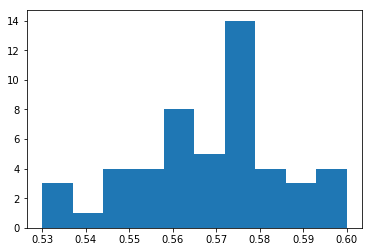

In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math
from scipy import integrate
from scipy.stats import expon
from scipy.stats import norm
from scipy.stats import uniform
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

def is_shaded_function(f1, f2, x, y):
    if f1(x) <= y <= f2(x):
        return 1
    else:
        return 0


def down_circle(x):
    return 1.0 - math.sqrt(1 - math.pow((x - 1), 2))


def up_circle(x):
    return math.sqrt(1 - math.pow(x, 2))


def estimate_area(n, k):
    count = 0
    estimated_area = []
    for k in range(0, k):
        for i in range(0, n):
            x = random.uniform(0, 1)
            y = random.uniform(0, 1)
            count += is_shaded_function(down_circle, up_circle, x, y)
        estimated_area.append(count/n)
        count = 0
    estimated_area = np.array(estimated_area)
    return estimated_area, estimated_area.std(ddof=1)


n = 500
k = 50
area_list, variance = estimate_area(n, k)
plt.hist(area_list)
plt.show()

Area-Estimation
1.Simulation Methodology

I generate n=500 samples (X, Y) of i.i.d 2-dimensional uniform random variables in the unit-square box and then counts the number of these samples fall within the region to estimate the area with below function:
\begin{equation}
EstimatedArea = Area_{box} * \frac{the number of samples fall within the region}{total nuber of samples}
\end{equation}


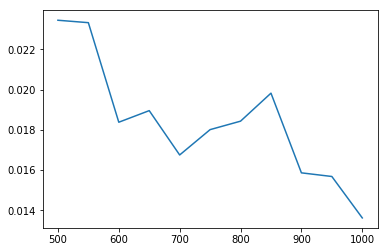

In [8]:
variance_list = []
for n in range(500, 1001, 50):
    area_list, variance = estimate_area(n, k)
    variance_list.append(variance)

x = np.arange(500, 1001, 50)
plt.plot(x, variance_list)
plt.show()

Theoretical Exploration or Analysis

From the figure above, we know that the variance decreses with the increment of n, that's because law of large numbers tell us that for a large enough fixed value of n, the sample mean using n samples will be close to the true mean with high probability.


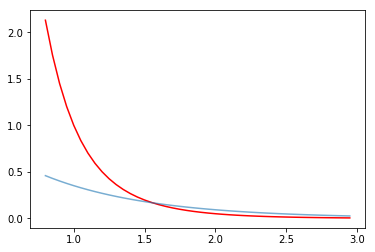

In [9]:
def function_a(x):
    if 0.8 <= x <= 3:
        return 1/(1 + math.sinh(2 * x) * math.log(x))
    else:
        return 0


def function_b(x, y):
    if -np.pi <= x <= np.pi and -np.pi <= y <= np.pi:
        return math.exp(-math.pow(x, 4) - math.pow(y, 4))
    else:
        return 0


def mc_integral(f, a, b, n=1000):
    estimate_list = []
    width = b - a
    for i in range(0, n):
        x = random.uniform(a, b)
        fx = f(x)
        estimate_list.append(width * fx)
    return np.mean(estimate_list)


x2 = np.arange(0.8, 3, 0.05)
fit_norm = norm(loc=0.75, scale=0.15)
fit_exp = expon(scale=0.75)

x3 = np.arange(-np.pi, np.pi, 0.1)
y3 = np.arange(-np.pi, np.pi, 0.1)
func1 = np.frompyfunc(function_a, 1, 1)

X, Y = np.meshgrid(x3, y3)
func2 = np.frompyfunc(function_b, 2, 1)
y2 = func1(x2)

z = func2(X, Y)
plt.plot(x2, y2, "red", label="real line")
plt.plot(x2, fit_exp.pdf(x2), alpha=0.6, label='norm pdf')

Theoretical Exploration or Analysis

Firstly, I draw the the first funtion in order to choose a reasonable box size and importance function.
Apparently, we know that the first function is monotone decreasing function and the maximux is about 2.1 so we choose the box is X~uniform[0.8, 3], Y~uniform[0,2.2]. And the exponential distribution is proportional to the function we need to integrate.

In [22]:
def confidence(M, Sn, n=1000):
    e = Sn * 1.96 / math.sqrt(n)
    return M-e, M+e

function_a_max = 2.2
n = 1000
count = 0
estimated_area = []
for k in range(0, 50):
    for i in range(0, n):
        x = random.uniform(0.8, 3)
        y = random.uniform(0, function_a_max)
        count += (1 if y <= function_a(x) else 0)
    estimated_area.append(function_a_max * (3 - 0.8) * count / n)
    count = 0

area, err = integrate.quad(function_a, 0.8, 3)
print("Actual area is", area)

estimated_area = np.array(estimated_area)
estimated_area_variance = estimated_area.std(ddof=1)
print("estimated area is", estimated_area.mean())
print("The variance of estimated area is", estimated_area_variance)
print("The 95% confidence interval is", 
      confidence(estimated_area.mean(), estimated_area_variance))

Actual area is 0.6095525763773304
estimated area is 0.6082912000000001
The variance of estimated area is 0.05323048078164332
The 95% confidence interval is (0.6049919406197702, 0.61159045938023)


In [24]:
fg = []
n = 1000
for k in range(0, 100):
    # X = np.random.uniform(low=0.8, high=3, size=n)
    X = fit_exp.rvs(size=n)
    # X = fit_norm.rvs(size=n)

    Y = func1(X)

    # Y1 = 1/(3 - 0.8)
    Y1 = fit_exp.pdf(X)
    # Y1 = fit_norm.pdf(X)

    Z = Y/Y1
    Imc = Z.sum()/n
    fg.append(Imc)

estimated_area = np.array(fg)
estimated_area_variance = estimated_area.std(ddof=1)
print("Estimated area with importance sampling is", estimated_area.mean())
print("The variance of estimated area is", estimated_area_variance)
print("The 95% confidence interval is", 
      confidence(estimated_area.mean(), estimated_area_variance))

Estimated area with importance sampling is 0.6089831327428201
The variance of estimated area is 0.03330292370760346
The 95% confidence interval is (0.6069189961463067, 0.6110472693393335)


In [27]:
n = 1000
strata = 10
sn = int(n/strata)
area_list = []
scale = (3-0.8)/strata
loc = 0.8
for k in range(0, 100):
    once_area_list = []
    for i in range(0, strata):
        x = uniform.rvs(loc=0.8 + i*scale, scale=scale, size=sn)
        y = func1(x)
        once_area_list.append(scale * np.mean(y))
    area_list.append(np.sum(once_area_list))
area = np.mean(area_list)

estimated_area = np.array(area_list)
estimated_area_variance = estimated_area.std(ddof=1)
print("Estimated area with stratified sampling is", estimated_area.mean())
print("The variance of estimated area is", estimated_area_variance)

print("The 95% confidence interval is", 
      confidence(estimated_area.mean(), estimated_area_variance))

Estimated area with stratified sampling is 0.6094556323748206
The variance of estimated area is 0.008606677099608988
The 95% confidence interval is (0.6089221850015012, 0.60998907974814)


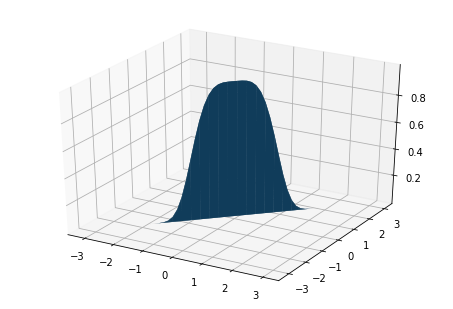

In [28]:
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_surface(x3, y3, z)
plt.show()

Theoretical Exploration or Analysis

Similarly, I draw the the second funtion in order to choose a reasonable box size and importance function.
Apparently, we know that the first function is monotone decreasing function and the maximux is about 0.8 so we choose the box is X~uniform[$-\pi$,$\pi$], Y~uniform[$-\pi$,$\pi$], Z~uniform[0,1]And the 2-d normal distribution is proportional to the function we need to integrate.

In [30]:
function_b_max = 1.0
n = 1000
count = 0
estimated_area = []
total_area = 2*np.pi*2*np.pi*1
for k in range(0, 50):
    for i in range(0, n):
        x = random.uniform(-np.pi, np.pi)
        y = random.uniform(-np.pi, np.pi)
        z = random.uniform(0, function_b_max)
        count += (1 if z <= function_b(x, y) else 0)
    estimated_area.append(total_area * count / n)
    count = 0

estimated_area = np.array(estimated_area)
estimated_area_variance = estimated_area.std(ddof=1)

area, err = integrate.dblquad(function_b, -np.pi, np.pi, lambda x: -np.pi, lambda x: np.pi)
print("Actual area is", area)

print("Estimated area is", estimated_area.mean())
print("The variance of estimated area is", estimated_area_variance)
print("The 95% confidence interval is", 
      confidence(estimated_area.mean(), estimated_area_variance))

Actual area is 3.2862618016493594
Estimated area is 3.268812977640796
The variance of estimated area is 0.34957500856483725
The 95% confidence interval is (3.247146094134096, 3.290479861147496)


In [37]:
fg = []
n = 1000
fit_norm1 = norm(loc=0.15, scale=1.0)
for k in range(0, 50):
    # X = np.random.uniform(low=-np.pi, high=np.pi, size=n)
    # Y = np.random.uniform(low=-np.pi, high=np.pi, size=n)

    X = fit_norm1.rvs(size=n)
    Y = fit_norm1.rvs(size=n)

    Z = func1(X, Y)
    Imc = np.mean(Z/(fit_norm1.pdf(X)*fit_norm1.pdf(Y)))
    # Imc = np.mean(Z) * math.pow(2*np.pi, 2)
    fg.append(Imc)

estimated_area = np.array(fg)
estimated_area_variance = estimated_area.std(ddof=1)
print("Estimated area with importance sampling is", estimated_area.mean())
print("The variance of estimated area is", estimated_area_variance)
print("The 95% confidence interval is", 
      confidence(estimated_area.mean(), estimated_area_variance))

Estimated area with importance sampling is 3.286138407429913
The variance of estimated area is 0.32338116801530853
The 95% confidence interval is (3.2660950349805673, 3.306181779879259)


In [38]:
n = 1000
strata = 10
sn = int(n/strata)
area_list = []
scale = (2 * np.pi)/strata
loc = -np.pi
for k in range(0, 50):
    once_area_list = []
    for i in range(0, strata):
        for j in range(0, strata):
            x = uniform.rvs(loc=loc + i * scale, scale=scale, size=sn)
            y = uniform.rvs(loc=loc + j * scale, scale=scale, size=sn)
            z = func2(x, y)
            imc = np.mean(z) * math.pow(scale, 2)
            once_area_list.append(imc)
    area_list.append(np.sum(once_area_list))
area = np.mean(area_list)

estimated_area = np.array(area_list)
estimated_area_variance = estimated_area.std(ddof=1)
print("Estimated area with stratified sampling is", area)
print("The variance of estimated area is", estimated_area_variance)
print("The 95% confidence interval is", 
      confidence(estimated_area.mean(), estimated_area_variance))

Estimated area with stratified sampling is 3.285335098420421
The variance of estimated area is 0.029347460131767242
The 95% confidence interval is (3.2835161239962964, 3.2871540728445456)


Theoretical Exploration or Analysis

Importance sampling
Often the integrand has a very small value on a dominant fraction of the whole integration volume:If the points are chosen evenly in the
integration volume, the small minority of the points close to the “peak” give the dominant contribution to the integral. And to estimate small probabilities, we have to calculate a very large n. But with importance sampling we dont requiren to be unreasonably large.
Importance sampling is to choose the random points so that more points are chosen around the peak, less where the integrand is small and thus reducing the variance and error.

Stratified Sampling
We divide the interval into smaller intervals and sum each subinterval. That's because variance of f over a subinterval hould be lower than the variance over whole interval

We use calculate confidence interval to test the quality of the integral estimator, it point out that importance sampling and stratified sampling can result in a smaller confidence interval. And the acutual value just lies on each confidence interval, which shows each method is valid. What's more, in our example,  stratified sampling are better than importance sampling, but it just can shows in this case stratified sampling are better because of variacne of the parameters. In fact, the quality of the importance sampling depends on the important sampling function and stratified sampling depends on the total number of interval partitioned. Of course, all of these method are proportional to the sampling size.

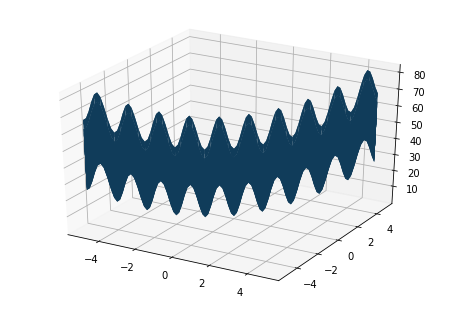

In [39]:
def function_c(x, y):
    if -5 <= x <= 5 and -5 <= y <= 5:
        return 20 + math.pow(x, 2) + math.pow(y, 2) - 10 * 
    (math.cos(2 * np.pi * x) + math.sin(2 * np.pi * y))
    else:
        return 0


x4 = np.arange(-5, 5, 0.1)
y4 = np.arange(-5, 5, 0.1)
func3 = np.frompyfunc(function_c, 2, 1)
X, Y = np.meshgrid(x4, y4)
z = func3(X, Y)

fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_surface(x4, y4, z)
plt.show()

In [40]:
area, err = integrate.dblquad(function_c, -5, 5, lambda x: -5, lambda x: 5)
print("Actual area is", area)

n = 1000
strata = 10
sn = int(n/strata)
area_list = []
scale = (2 * 5)/strata
loc = -5
for k in range(0, 50):
    once_area_list = []
    for i in range(0, strata):
        for j in range(0, strata):
            x = uniform.rvs(loc=loc + i * scale, scale=scale, size=sn)
            y = uniform.rvs(loc=loc + j * scale, scale=scale, size=sn)
            z = func3(x, y)
            imc = np.mean(z) * math.pow(scale, 2)
            once_area_list.append(imc)
    area_list.append(np.sum(once_area_list))
area = np.mean(area_list)

estimated_area = np.array(area_list)
estimated_area_variance = estimated_area.std(ddof=1)
print("Estimated area with stratified sampling is", area)
print("The variance of estimated area is", estimated_area_variance)
print("The 95% confidence interval is", 
      confidence(estimated_area.mean(), estimated_area_variance))

Actual area is 3666.666666666666
Estimated area with stratified sampling is 3667.225118565357
The variance of estimated area is 9.923728370173912
The 95% confidence interval is (3666.6100395085577, 3667.8401976221567)
